<a href="https://colab.research.google.com/github/Raut-Raj/IBM_Projects/blob/main/Python_project_IBM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 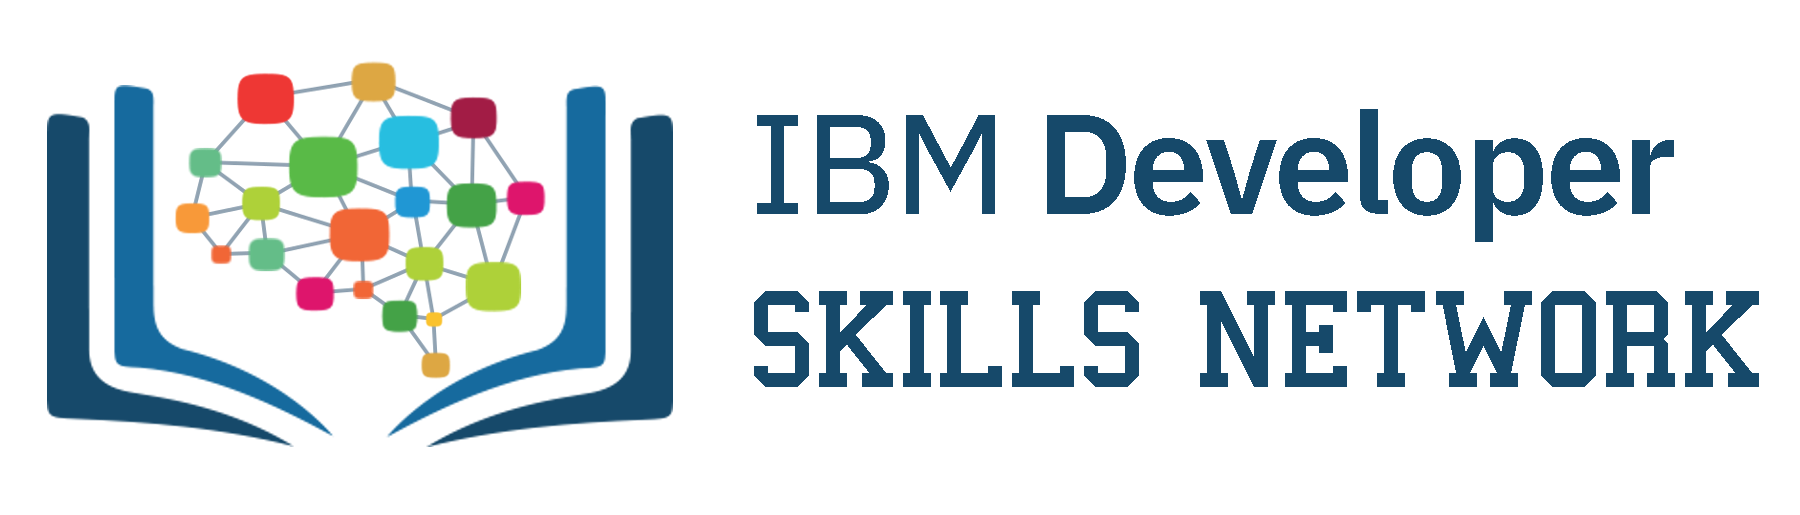

# Extracting Tesla Stock Data.

### Question 1 - Extracting Tesla Stock Data Using yfinance

In [1]:
import yfinance as yf

tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="1y")
print(tesla_data.head())


                                 Open        High         Low       Close  \
Date                                                                        
2023-10-17 00:00:00-04:00  250.100006  257.179993  247.080002  254.850006   
2023-10-18 00:00:00-04:00  252.699997  254.630005  242.080002  242.679993   
2023-10-19 00:00:00-04:00  225.949997  230.610001  216.779999  220.110001   
2023-10-20 00:00:00-04:00  217.009995  218.860001  210.419998  211.990005   
2023-10-23 00:00:00-04:00  210.000000  216.979996  202.509995  212.080002   

                              Volume  Dividends  Stock Splits  
Date                                                           
2023-10-17 00:00:00-04:00   93562900        0.0           0.0  
2023-10-18 00:00:00-04:00  125147800        0.0           0.0  
2023-10-19 00:00:00-04:00  170772700        0.0           0.0  
2023-10-20 00:00:00-04:00  137734000        0.0           0.0  
2023-10-23 00:00:00-04:00  150683400        0.0           0.0  


### Question 2: Extracting Tesla Revenue Data Using Webscraping

In [3]:
import requests
from bs4 import BeautifulSoup

def get_tesla_revenue():
    url = 'https://finance.yahoo.com/quote/TSLA/financials?p=TSLA'
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')

    revenue_element = soup.find('td', text='Total Revenue')
    if revenue_element:
        revenue = revenue_element.find_next_sibling('td').text
        return revenue
    else:
        print("Error: 'Total Revenue' element not found on the page.")
        return None

tesla_revenue = get_tesla_revenue()
if tesla_revenue:
    print(f'Tesla Revenue: {tesla_revenue}')

Error: 'Total Revenue' element not found on the page.


<ipython-input-3-cca56fce7480>:11: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  revenue_element = soup.find('td', text='Total Revenue')


### Question 3: Extracting GameStop Stock Data Using yfinance

In [4]:
gamestop = yf.Ticker("GME")
gamestop_data = gamestop.history(period="1y")
print(gamestop_data.head())

                            Open   High    Low  Close   Volume  Dividends  \
Date                                                                        
2023-10-17 00:00:00-04:00  14.25  14.83  14.10  14.12  3842400        0.0   
2023-10-18 00:00:00-04:00  14.00  14.25  13.81  13.85  4045800        0.0   
2023-10-19 00:00:00-04:00  13.80  13.85  12.90  13.16  5808000        0.0   
2023-10-20 00:00:00-04:00  13.18  13.80  13.12  13.44  3657600        0.0   
2023-10-23 00:00:00-04:00  13.28  13.59  13.04  13.44  2785500        0.0   

                           Stock Splits  
Date                                     
2023-10-17 00:00:00-04:00           0.0  
2023-10-18 00:00:00-04:00           0.0  
2023-10-19 00:00:00-04:00           0.0  
2023-10-20 00:00:00-04:00           0.0  
2023-10-23 00:00:00-04:00           0.0  


### Question 4: Extracting GameStop Revenue Data Using Webscraping

In [6]:
def get_gamestop_revenue():
    url = 'https://finance.yahoo.com/quote/GME/financials?p=GME'
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    revenue_element = soup.find('td', text='Total Revenue')
    if revenue_element:
        revenue = revenue_element.find_next_sibling('td').text
        return revenue
    else:
        print("Error: 'Total Revenue' element not found on the page.")
        return None

gamestop_revenue = get_gamestop_revenue()
if gamestop_revenue:
    print(f'GameStop Revenue: {gamestop_revenue}')

Error: 'Total Revenue' element not found on the page.


<ipython-input-6-cff1f442c4fb>:8: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  revenue_element = soup.find('td', text='Total Revenue')


### Question 5: Tesla Stock and Revenue Dashboard

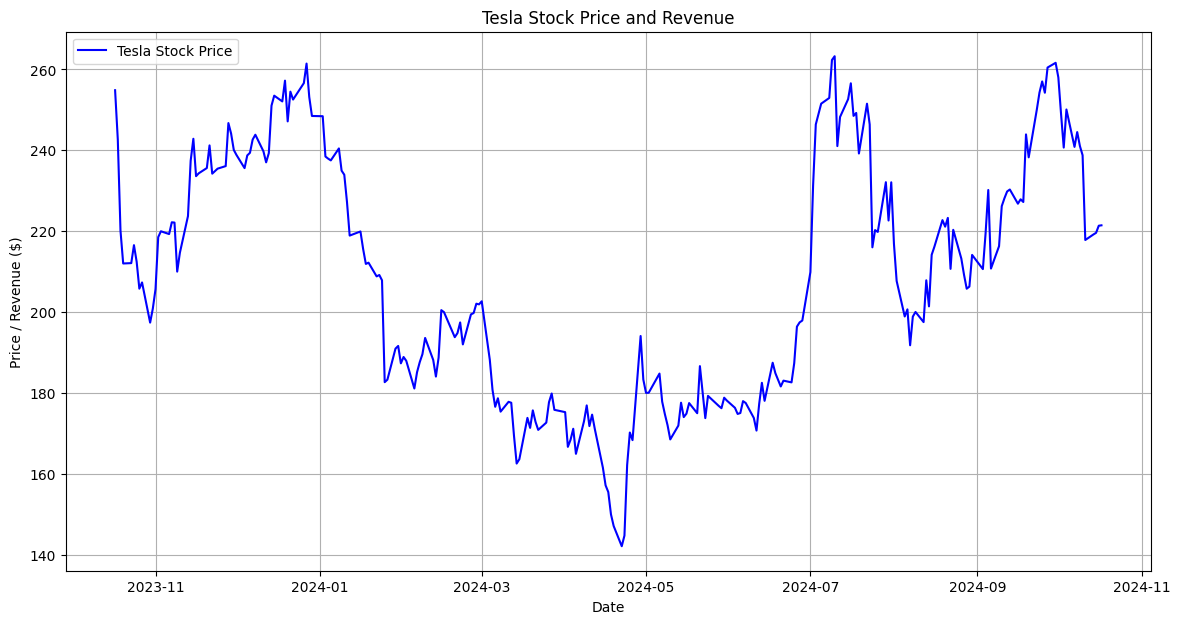

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
plt.plot(tesla_data.index, tesla_data['Close'], label='Tesla Stock Price', color='blue')

if tesla_revenue is not None:
    tesla_revenue_numeric = float(tesla_revenue.replace(',', '').replace('$', ''))

    plt.axhline(y=tesla_revenue_numeric, color='orange', linestyle='--', label='Tesla Revenue')
else:
    print("Warning: Tesla revenue data not found. Revenue line will not be plotted.")

plt.title('Tesla Stock Price and Revenue')
plt.xlabel('Date')
plt.ylabel('Price / Revenue ($)')
plt.legend()
plt.grid()
plt.show()

### Question 6: GameStop Stock and Revenue Dashboard

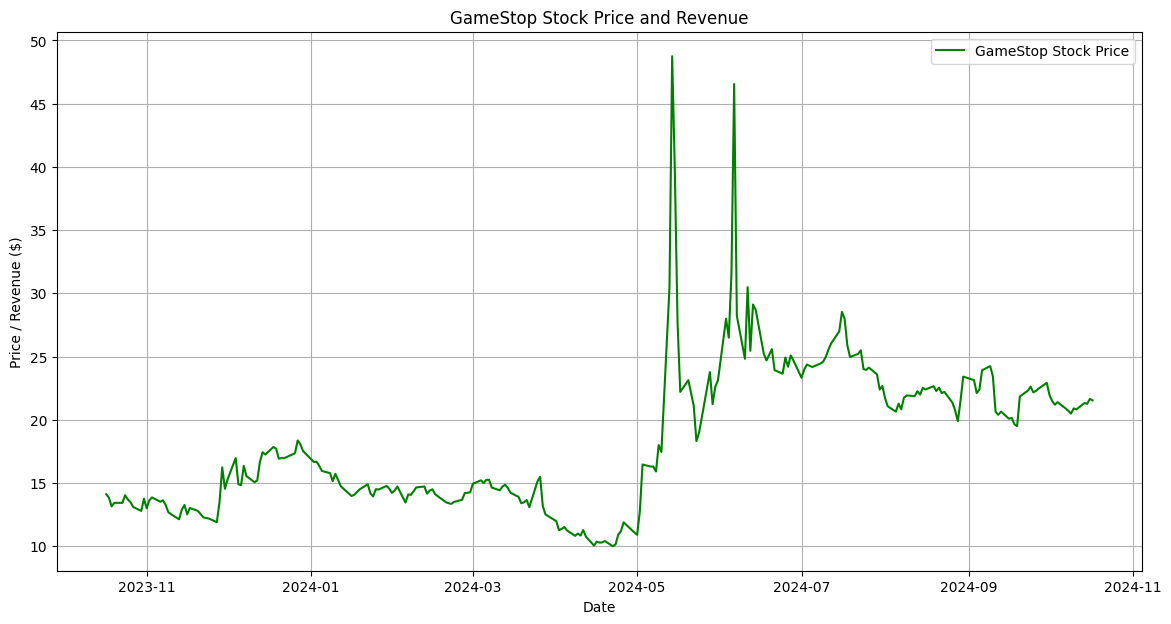

In [10]:
plt.figure(figsize=(14, 7))
plt.plot(gamestop_data.index, gamestop_data['Close'], label='GameStop Stock Price', color='green')
if gamestop_revenue is not None:

    gamestop_revenue_numeric = float(gamestop_revenue.replace(',', '').replace('$', ''))
    plt.axhline(y=gamestop_revenue_numeric, color='red', linestyle='--', label='GameStop Revenue')
else:
    print("Warning: GameStop revenue data not found. Revenue line will not be plotted.")


plt.title('GameStop Stock Price and Revenue')
plt.xlabel('Date')
plt.ylabel('Price / Revenue ($)')
plt.legend()
plt.grid()
plt.show()